In [4]:
import scanpy as sc
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import PyComplexHeatmap as pch
import seaborn as sns
import geopandas as gpd
import gzip
import matplotlib.patches as patches
from PIL import Image
from shapely.affinity import scale
from shapely.geometry import box
import random
import spatialdata
import spatialdata_io
random.seed(42)
np.random.seed(42)
import warnings
warnings.filterwarnings('ignore')

In [ ]:
plot_dir = '/Users/bzhao2/Library/CloudStorage/OneDrive-InsideMDAnderson/akdemirlab-projects/01_catalyst/scripts/figures/Fig5/Fig5.2/plots'


In [7]:
# cell_type_colors = {
#         'AC-like': '#4daf4a',          # Green
#         'OPC-like': '#377eb8',         # Blue
#         'Myeloid': '#984ea3',         # Purple
#         'MES-like': '#e41a1c',          # Red
#         'Oligodendrocyte': '#ff7f00',  # Orange
#         'Pericyte': '#f781bf',         # Yellow
#         'Cycling': '#a65628',          # Brown
#         'Endothelial': '#00ff00',      # Pink
#         'Excitatory neuron': '#6C94FF',# Grey
#         'T cell': '#ffff33',           # Bright Green
#         'Inhibitory neuron': '#555555', # Dark Gray
#         'Other': "#808080"  # Gray for 'Other'
#     }

# cell_type_colors = {
#         'AC-like': "#A3C4DC", #(soft sky blue)
#         'OPC-like': "#8FA8C8", #(desaturated blue-gray)
#         'Myeloid': "#D3A5C8", #(muted mauve)
#         'MES-like': "#D9735A", #(burnt coral for stronger contrast)
#         'Oligodendrocyte': "#9F5F80", #(muted plum to distinguish from MES-like)
#         'Pericyte': "#E3C07E", #(soft mustard yellow)
#         'Cycling': "#A69AB2", # (muted lavender)
#         'Endothelial': "#A8D7A9", # (pale mint green)
#         'Excitatory neuron': "#D6D2C4", #(muted beige)
#         'T cell': "#89A970", #(soft olive green)
#         'Inhibitory neuron': "#656565", # (medium gray)
#         'Other': "#808080"  # Gray for 'Other'
#     }

cell_type_colors = {
        'AC-like': "#92B0C6", #(soft sky blue)
        'OPC-like': "#F1A340", #(desaturated blue-gray)
        'Myeloid': "#D3A5C8", #(muted mauve)
        'MES-like': "#D9735A", #(burnt coral for stronger contrast)
        'Oligodendrocyte': "#9F5F80", #(muted plum to distinguish from MES-like)
        'Pericyte': "#B0408A", #(soft mustard yellow)
        'Cycling': "#A69AB2", # (muted lavender)
        'Endothelial': "#DD51AD", # (pale mint green)
        'Excitatory neuron': "#D6D2C4", #(muted beige)
        'T cell': "#89A970", #(soft olive green)
        'Inhibitory neuron': "#656565", # (medium gray)
        # 'Other': "#808080"  # Gray for 'Other'
    }


In [ ]:
### plot with default 5um nucleus expansion 
spdata = spatialdata_io.xenium('/Users/bzhao2/Library/CloudStorage/OneDrive-InsideMDAnderson/akdemirlab-projects/01_catalyst/data/raw/xenium/p65R1_output-XETG00091__0006213__Region_2__20230907__220358/outs')
gdf = spdata.shapes['cell_boundaries']
cells = pd.read_csv('/Users/bzhao2/Library/CloudStorage/OneDrive-InsideMDAnderson/akdemirlab-projects/01_catalyst/scripts/pipelines/xenium/local/p65R1/p65R1_cell_type.csv')
gdf = gdf.merge(cells, on='cell_id', how='inner')

INFO     reading                                                                                                   
         /Users/bzhao2/Library/CloudStorage/OneDrive-InsideMDAnderson/akdemirlab-projects/01_catalyst/data/raw/xeni
         um/p65R1_output-XETG00091__0006213__Region_2__20230907__220358/outs/cell_feature_matrix.h5                


In [15]:

gdf['color'] = gdf['group'].map(cell_type_colors)


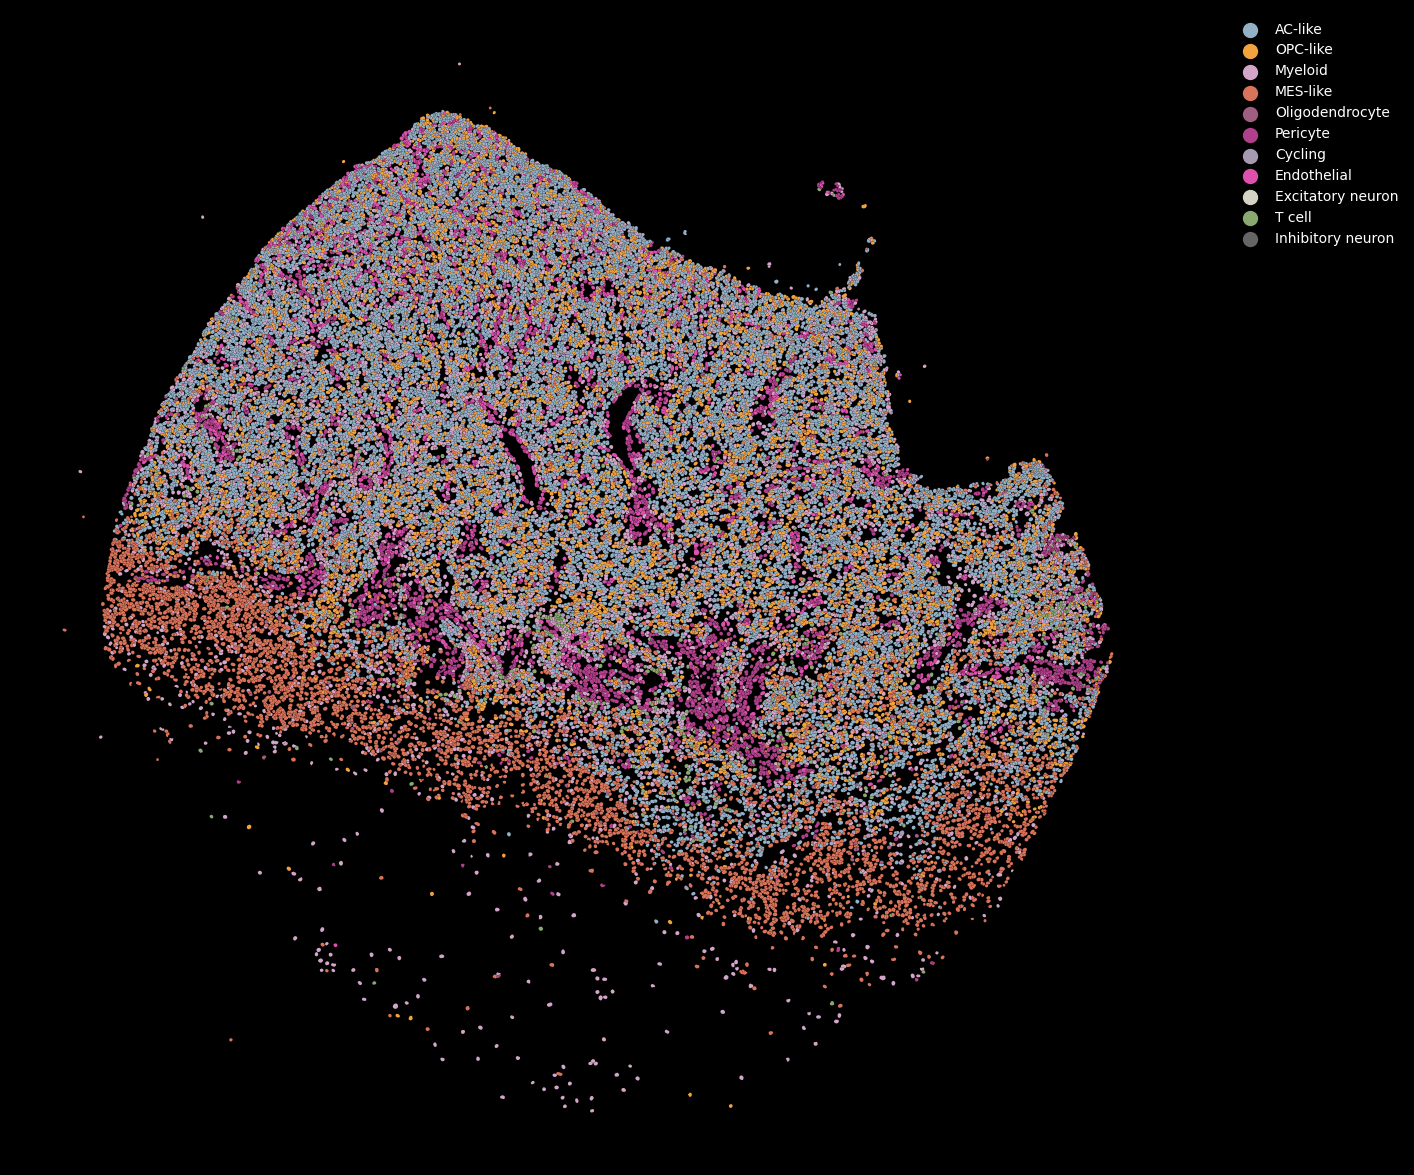

In [21]:
sample = 'p65R1'
plt.style.use('dark_background')
fig, ax = plt.subplots(figsize=(15,15))
# gdf['edgecolor'] = 'none'
# gdf.loc[gdf['cell_type_final'] == 'T cell', 'edgecolor'] = 'red'
gdf.plot(ax=ax, color=gdf['color'], legend=True, aspect=1)
# if bbox is not None:
#     rect = patches.Rectangle((bbox[0], bbox[2]), bbox[1]-bbox[0], bbox[3]-bbox[2], 
#                            linewidth=3, edgecolor='white', facecolor='none')
#     ax.add_patch(rect)
# Add legend manually
handles = [plt.scatter([], [], c=color, label=label, marker='o', s=100) for label, color in cell_type_colors.items()]
ax.legend(handles=handles, bbox_to_anchor=(1.05, 1), frameon=False,loc='upper left')
ax.spines[['top', 'right', 'left', 'bottom']].set_visible(False)
ax.set_xticks([])
ax.set_yticks([])
ax.set_xticklabels([])
ax.set_yticklabels([])
# ax.set_title(sample)
ax.invert_yaxis()
fig.savefig(f"{plot_dir}/{sample}_region_plot_nucleus_expansion_cellshape.png", dpi=600, bbox_inches='tight')
plt.show()